# Fake News Detection using NLP Techniques and Machine Learning Model.

## Ajay Rajput (c0871742), Rahul Rawal (c0871230), Dhru Prajapati (c0867085)

## (1.) Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## (2.) Loading Dataset

In [2]:
pd.set_option('display.max_colwidth', 100)

true_news_df = pd.read_csv('True.csv')
fake_news_df = pd.read_csv('Fake.csv')

In [3]:
true_news_df.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip their fiscal script","WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who v...",politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits on Monday: Pentagon,WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U....,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Mueller do his job',WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President T...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat tip-off: NYT,WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much more' for Amazon shipments,SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service on Frida...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spending, immigration","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - The White House said on Friday it was set to kick o...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but timeline unclear: NYT","WEST PALM BEACH, Fla (Reuters) - President Donald Trump said on Thursday he believes he will be ...",politicsNews,"December 29, 2017"
7,"Factbox: Trump on Twitter (Dec 29) - Approval rating, Amazon",The following statements were posted to the verified Twitter accounts of U.S. President Donald T...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the verified Twitter accounts of U.S. President Donald T...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jones today despite challenge: CNN,WASHINGTON (Reuters) - Alabama Secretary of State John Merrill said he will certify Democratic S...,politicsNews,"December 28, 2017"


In [4]:
fake_news_df.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he...",News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under th...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’,"On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered ...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES),"On Christmas day, Donald Trump announced that he would be back to work the following day, but ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump During His Christmas Speech,Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentionin...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While He Is In Handcuffs (GRAPHIC IMAGES),"The number of cases of cops brutalizing and killing people of color seems to see no end. Now, we...",News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out At FBI Deputy Director And James Comey","Donald Trump spent a good portion of his day at his golf club, marking the 84th day he s done so...",News,"December 23, 2017"
7,"Trump Said Some INSANELY Racist Stuff Inside The Oval Office, And Witnesses Back It Up",In the wake of yet another court decision that derailed Donald Trump s plan to bar Muslims from ...,News,"December 23, 2017"
8,"Former CIA Director Slams Trump Over UN Bullying, Openly Suggests He’s Acting Like A Dictator (...",Many people have raised the alarm regarding the fact that Donald Trump is dangerously close to b...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Much A** Kissing It Will Make You Sick,Just when you might have thought we d get a break from watching people kiss Donald Trump s ass a...,News,"December 21, 2017"


### (i.) Shapes of both datasets

In [5]:
print("Fake News: ",fake_news_df.shape)
print("True News: ",true_news_df.shape)

Fake News:  (23481, 4)
True News:  (21417, 4)


### (ii.) Exploring Datatypes and Data Description

In [6]:
## Data Types and Null Values...

fake_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [7]:
## Data Types and Null Values...

true_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


### (iii.) Fake News Description

In [8]:
fake_news_df.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found...,,News,"May 10, 2017"
freq,6,626,9050,46


### (iv.) True News Description

In [9]:
true_news_df.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administration,(Reuters) - Highlights for U.S. President Donald Trump’s administration on Thursday: The United ...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


### (v.) Unique Subjects 

In [10]:

print("Fake News Subjects:", fake_news_df['subject'].unique())
print("True News Subjects:", true_news_df['subject'].unique())


Fake News Subjects: ['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']
True News Subjects: ['politicsNews' 'worldnews']


### (vi.) Dropping Null Values

From below description it is clear that we do not have any null values in the dataset, meaning that feature in each row contains
some values.

In [11]:
fake_news_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [12]:
true_news_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

### (vii.) Droping Duplicate Values

In [13]:
fake_news_df.drop_duplicates()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he...",News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under th...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’,"On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered ...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES),"On Christmas day, Donald Trump announced that he would be back to work the following day, but ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump During His Christmas Speech,Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentionin...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated US Sailors Well,"21st Century Wire says As 21WIRE reported earlier this week, the unlikely mishap of two US Nav...",Middle-east,"January 16, 2016"
23477,"JUSTICE? Yahoo Settles E-mail Privacy Class-action: $4M for Lawyers, $0 for Users","21st Century Wire says It s a familiar theme. Whenever there is a dispute or a change of law, an...",Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to Take Territorial Booty in Northern Syria,Patrick Henningsen 21st Century WireRemember when the Obama Administration told the world how i...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America Finally Calls it Quits,21st Century Wire says Al Jazeera America will go down in history as one of the biggest failures...,Middle-east,"January 14, 2016"


In [14]:
duplicates = true_news_df.drop_duplicates()

duplicates

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip their fiscal script","WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who v...",politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits on Monday: Pentagon,WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U....,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Mueller do his job',WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President T...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat tip-off: NYT,WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much more' for Amazon shipments,SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service on Frida...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach on Afghanistan,BRUSSELS (Reuters) - NATO allies on Tuesday welcomed President Donald Trump s decision to commit...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese market,"LONDON (Reuters) - LexisNexis, a provider of legal, regulatory and business information, said on...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,"MINSK (Reuters) - In the shadow of disused Soviet-era factories in Minsk, a street lined with ec...",worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis visiting Russia,MOSCOW (Reuters) - Vatican Secretary of State Cardinal Pietro Parolin said on Tuesday that there...,worldnews,"August 22, 2017"


## (3.)  Adding Lables to Fake_News and True_News Datasets

In [15]:
fake_news_df['label'] = 0
true_news_df['label'] = 1

In [16]:
fake_news_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he...",News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under th...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’,"On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered ...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES),"On Christmas day, Donald Trump announced that he would be back to work the following day, but ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump During His Christmas Speech,Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentionin...,News,"December 25, 2017",0


In [17]:
true_news_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip their fiscal script","WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who v...",politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits on Monday: Pentagon,WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U....,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Mueller do his job',WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President T...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat tip-off: NYT,WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much more' for Amazon shipments,SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service on Frida...,politicsNews,"December 29, 2017",1


## (4.) Concating both the Data-Framses to make a single Dataset (Final_News)

In [18]:
final_news_df = pd.concat([fake_news_df, true_news_df], axis = 0)

In [19]:
final_news_df = final_news_df.sample(frac= 1)

In [20]:
final_news_df.reset_index(inplace= True)

In [21]:
final_news_df.drop(final_news_df.columns[0], axis=1, inplace= True)

In [22]:
final_news_df

,title,text,subject,date,label
0,Russian suspect detained after arson attacks against last tsar film,MOSCOW (Reuters) - A Russian court ordered the detention of a man on Saturday on suspicion of tr...,worldnews,"September 23, 2017",1
1,BERNIE SANDERS Makes A Promise To All Americans That You Really Won’t Believe [Video],This guy is crazy! The last thing Americans needs is higher taxes!,politics,"Oct 18, 2015",0
2,Democrats in disarray on eve of convention to nominate Clinton,PHILADELPHIA (Reuters) - The head of the Democratic Party resigned on Sunday amid a furor over e...,politicsNews,"July 24, 2016",1
3,"Trump on Twitter (August 8): Opioid crisis, North Korea",The following statements were posted to the verified Twitter accounts of U.S. President Donald T...,politicsNews,"August 8, 2017",1
4,BREAKING: Biden Won’t Run…Is It Because Biden And Obama Can’t Risk Repercussions Of Exposing Hil...,This announcement seems to indicate that the Obama regime already knows Hillary is going to be w...,Government News,"Oct 21, 2015",0
...,...,...,...,...,...
44893,The Battle against Islamic State,"(Reuters) - It was an awkward coalition riven by political and sectarian differences, facing an ...",worldnews,"December 4, 2017",1
44894,HILLARY IS FURIOUS OVER EMAIL HACKS…Openly Threatens War With Russia…Media Is SILENT [VIDEO],But the media s concerned Trump is the threat to our national security with his reckless words....,politics,"Sep 3, 2016",0
44895,Miami Mayor Doesn’t Know History: Blames Hurricane Irma On Climate Change,Miami s mayor decided to jump into the discussion about whether climate change is the reason for...,politics,"Sep 9, 2017",0
44896,UK foreign secretary says Hariri should return to Lebanon,BEIRUT (Reuters) - British Foreign Secretary Boris Johnson said on Sunday he hopes Saad al-Harir...,worldnews,"November 12, 2017",1


## (5.) Feature Engineering

In [23]:
import string
from nltk.tokenize import word_tokenize
import re
import nltk
from nltk.corpus import stopwords

### (i.) Punctuation_count

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
def punct_count(text):
    
    text_length = sum([1 for x in text if x in string.punctuation])
    
    return text_length

In [25]:
final_news_df['punct_count'] = final_news_df['text'].apply(lambda x : punct_count(x))

### (ii.) text_body_length

In [26]:
final_news_df['text_body_length'] = final_news_df['text'].apply(lambda x: len(x) - x.count(" "))

In [27]:
final_news_df.head(10)

,title,text,subject,date,label,punct_count,text_body_length
0,Russian suspect detained after arson attacks against last tsar film,MOSCOW (Reuters) - A Russian court ordered the detention of a man on Saturday on suspicion of tr...,worldnews,"September 23, 2017",1,36,1812
1,BERNIE SANDERS Makes A Promise To All Americans That You Really Won’t Believe [Video],This guy is crazy! The last thing Americans needs is higher taxes!,politics,"Oct 18, 2015",0,2,55
2,Democrats in disarray on eve of convention to nominate Clinton,PHILADELPHIA (Reuters) - The head of the Democratic Party resigned on Sunday amid a furor over e...,politicsNews,"July 24, 2016",1,115,4788
3,"Trump on Twitter (August 8): Opioid crisis, North Korea",The following statements were posted to the verified Twitter accounts of U.S. President Donald T...,politicsNews,"August 8, 2017",1,53,766
4,BREAKING: Biden Won’t Run…Is It Because Biden And Obama Can’t Risk Repercussions Of Exposing Hil...,This announcement seems to indicate that the Obama regime already knows Hillary is going to be w...,Government News,"Oct 21, 2015",0,53,1682
5,Trump urges China's Xi to convince North Korea to end provocations: White House,WASHINGTON (Reuters) - U.S. President Donald Trump on Wednesday called on Chinese President Xi J...,worldnews,"November 29, 2017",1,9,419
6,JUST IN: Documents Reveal Hillary Clinton “Struck a Deal” to Keep Records Private,Here s yet another reason to be very suspicious of the Obama administration and Hillary Clinton:...,Government News,"Dec 14, 2017",0,56,2092
7,How Kim Davis Got A Seat To Attend State Of The Union Is Just As Pathetic As Kim Davis,If there s one person in this entire nation who does not deserve a seat at the State of the Unio...,News,"January 12, 2016",0,46,1660
8,Twitter Just Apologized For Making Donald Trump President,"I think that maybe I wouldn t be here if it wasn t for Twitter, Donald Trump told Fox News ear...",News,"May 20, 2017",0,21,1054
9,Kremlin says Russia not accused in U.S. case against ex-Trump aides,MOSCOW (Reuters) - The Kremlin said on Tuesday that U.S. charges against President Donald Trump ...,worldnews,"October 31, 2017",1,77,3169


### (iii.) Droping Unwanted Data Fields(Features)

As the "Date" field and the "Subject" field does not contribute much into our dataset and machine learning model..!

In [28]:
final_news_df.drop(['subject', 'date'], axis=1, inplace= True)

## (6.) Data Prepration for Machine Learning Model  (Wrangaling and Cleaning )

In [29]:
## Importing Vectorizer and Initializing Lemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

lemmatizer = nltk .WordNetLemmatizer()

### (i.) Dropping Data points that has zero(0) value in text_body_lenght 

In [30]:
zero_value_indexs = final_news_df[final_news_df['text_body_length'] == 0].index

final_news_df.drop(index= zero_value_indexs, inplace= True)

### (ii.) Cleaning data (Removing punctuation, stopwords and Lemmatizing the text)

In [31]:
def data_cleaning(text):
    
    ## converting text into lower case
    data = text.lower()
    
    ## Removing Punctuations
    no_punct_data = re.sub(r'\W+', ' ', data)
    
    ## tokenizing the text
    tokenize_text = re.split(r'\s', no_punct_data)
    
    ## Stopwords
    stop_words = stopwords.words('english')
    
    ## Removing Stopwords and Lemmatizing the text
    clean_data = " ".join([lemmatizer.lemmatize(x) for x in tokenize_text if x not in stop_words])
    
    
    return clean_data

In [32]:
final_news_df['text'] = final_news_df['text'].apply(lambda x: data_cleaning(x))

In [33]:
final_news_df['title'] = final_news_df['title'].apply(lambda x: data_cleaning(x))

In [34]:
# final_news_df.head()

### (iii.) Adding tokenize list of text_body into Dataset

In [35]:
final_news_df['tokenized_text'] = final_news_df['text'].apply(lambda x: word_tokenize(x))

In [36]:
final_news_df.head()

,title,text,label,punct_count,text_body_length,tokenized_text
0,russian suspect detained arson attack last tsar film,moscow reuters russian court ordered detention man saturday suspicion trying intimidate cinema s...,1,36,1812,"[moscow, reuters, russian, court, ordered, detention, man, saturday, suspicion, trying, intimida..."
1,bernie sander make promise american really believe video,guy crazy last thing american need higher tax,0,2,55,"[guy, crazy, last, thing, american, need, higher, tax]"
2,democrat disarray eve convention nominate clinton,philadelphia reuters head democratic party resigned sunday amid furor embarrassing leaked email ...,1,115,4788,"[philadelphia, reuters, head, democratic, party, resigned, sunday, amid, furor, embarrassing, le..."
3,trump twitter august 8 opioid crisis north korea,following statement posted verified twitter account u president donald trump realdonaldtrump pot...,1,53,766,"[following, statement, posted, verified, twitter, account, u, president, donald, trump, realdona..."
4,breaking biden run biden obama risk repercussion exposing hillary video,announcement seems indicate obama regime already know hillary going walking away unscathed bengh...,0,53,1682,"[announcement, seems, indicate, obama, regime, already, know, hillary, going, walking, away, uns..."


## (7.) Visualizing some key factors of the dataset

### (i.) Historgam for Text Body lengthh 

In [37]:
import seaborn as sns
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt


# wordcloud
from wordcloud import WordCloud

In [38]:
fake_data = final_news_df[final_news_df['label'] == 0]
true_data = final_news_df[final_news_df['label'] == 1]

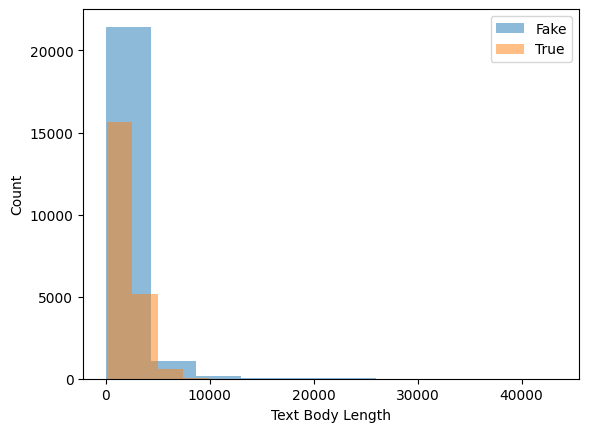

In [39]:

# create histogram of text body lengths for fake news articles
plt.hist(fake_data['text_body_length'], bins=10, alpha=0.5, label='Fake', )

# create histogram of text body lengths for true news articles
plt.hist(true_data['text_body_length'], bins=10, alpha=0.5, label='True')


plt.xlabel('Text Body Length')

plt.ylabel('Count')

plt.legend(loc='upper right')


## Saving the plot 

plt.savefig("Hist1.png")


plt.show()


### (ii.) Word Cloud of Textbody Tokens

### (a.) Fake News Tokens WordCloud

In [40]:
fake_news_tokens = final_news_df[final_news_df['label'] == 0]['tokenized_text']

In [41]:
fake_news_text =  str([" ".join(x) for x in fake_news_tokens])

In [42]:
fake_wordcloud = WordCloud(width= 800, height= 400, max_words= 100, collocations= True).generate(fake_news_text)

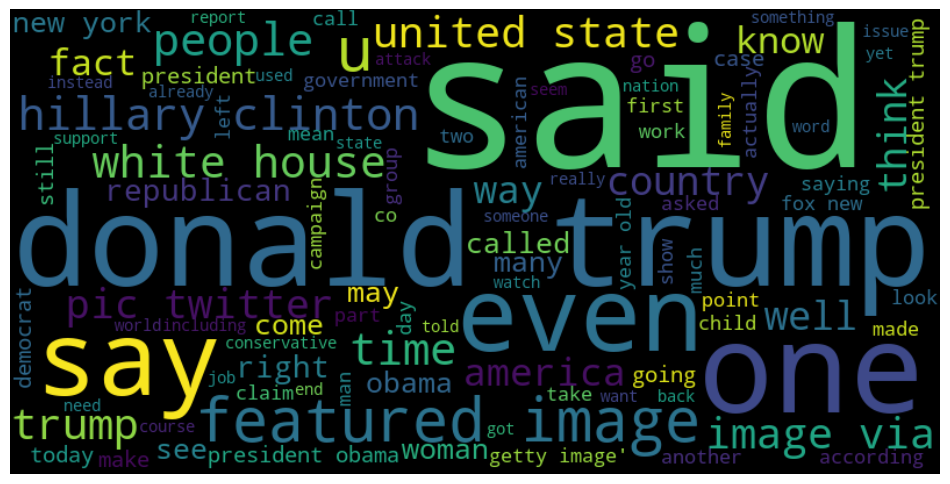

In [43]:
plt.figure(figsize=(12, 8))
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("FakeWordCloud.png")
plt.show()

### (b.) True News Tokens WordCloud

In [44]:
true_news_tokens = final_news_df[final_news_df['label'] == 1]['tokenized_text']

In [45]:
true_news_text =  str([" ".join(x) for x in true_news_tokens])

In [46]:
true_wordcloud = WordCloud(width= 800, height= 400, max_words= 100, collocations= True).generate(true_news_text)

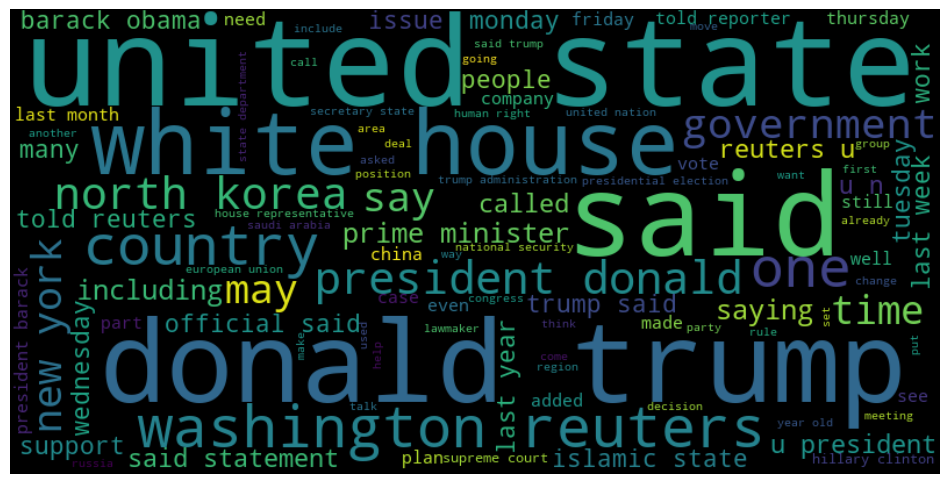

In [47]:
plt.figure(figsize=(12, 8))
plt.imshow(true_wordcloud, interpolation='bilinear')
plt.title = ""
plt.axis('off')
plt.show()

## (8.) Spliting Data into Train and Test Sets

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = final_news_df['text']
Y = final_news_df['label']

In [50]:
#Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### (i.) Shape of Train and Test data

In [51]:
print(X_train.shape , X_test.shape)

(35413,) (8854,)


## (9.) Text Vectorization

In [52]:
## We are using TFIDF Vectorizer.

from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
vectorizer = TfidfVectorizer(max_features=50000, lowercase= False, ngram_range=(1,2))

In [54]:
X_train_vect = vectorizer.fit_transform(X_train)

X_train_vect = X_train_vect.toarray()

In [55]:
X_test_vect = vectorizer.transform(X_test)

X_test_vect = X_test_vect.toarray()

### (i.) Shape of vectorized Train and Test data

In [56]:
print(X_train_vect.shape, X_test_vect.shape)

(35413, 50000) (8854, 50000)


### (ii.) Saving Vectorized Data into Datasets

In [57]:
training_data = pd.DataFrame(X_train_vect , columns=vectorizer.get_feature_names_out())
testing_data = pd.DataFrame(X_test_vect , columns= vectorizer.get_feature_names_out())

In [58]:
training_data.head(5)

,00,00 mark,00 pm,000,000 000,000 according,000 acre,000 ad,000 additional,000 american,...,zor,zor city,zor province,zucker,zuckerberg,zuckerberg said,zuma,zuma said,zurich,zurich reuters
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.047888,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.059289,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## (10.) Initializign Model and Training Model

In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [60]:
# Train a Multinomial Naive Bayes model on the training data

model = MultinomialNB()

model.fit(training_data, y_train)

MultinomialNB()

In [61]:
# Make predictions on the Testing data using the trained model
y_pred = model.predict(testing_data)

# Evaluate the accuracy of the model
testdata_accuracy = accuracy_score(y_test, y_pred)

print("Test set Accuracy:", testdata_accuracy * 100)

Test set Accuracy: 95.25638129658911


In [62]:
# Make predictions on the Training data using the trained model
y_train_pred = model.predict(training_data)

# Evaluate the accuracy of the model
traindata_accuracy = accuracy_score(y_train, y_train_pred)

print("Training set Accuracy:", traindata_accuracy)

Training set Accuracy: 0.9577273882472538


In [63]:
model.score(training_data, y_train)

0.9577273882472538

In [64]:
model.score(testing_data, y_test)

0.9525638129658911

## (11.) Saving Model

In [65]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']

In [66]:
new_data = data_cleaning(str("ChatGPT is generating fake news stories — attributed to real journalists. I set out to separate fact from fiction."))

In [67]:
model = joblib.load('model.pkl')


new_vect_data = vectorizer.transform([new_data]).toarray()

# df = pd.DataFrame(new_vect_data, vectorizer.get_feature_names_out)

predicted_labels = model.predict(new_vect_data)

print(predicted_labels)

if predicted_labels[0] == 0:
    
    print("This is a Fake News")

else:

    print("This is a True News")
    

[0]
This is a Fake News


C:\Users\rwlra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
